In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
# sys.path.append('/home/jovyan/work/GitHub/EvanPys/Progress')
sys.path.append(r'C:\Users\evanlee\Documents\GitHub\EvanPys\Progress')
# sys.path.append('/Users/evanli/Documents/EvanPys/Progress')
from ADlasso2 import AD2_w_utils_lossdiff as ad

import scanpy as sc

In [2]:
ztrans_L1 = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_and_ztrans\Hao_L1_repcells_loginv_Harmony_ztrans.h5ad")
print(ztrans_L1.shape)
label_z = ztrans_L1.obs['celltype.l1'].tolist()
types = np.unique(label_z).tolist()
print('all cell types:', types)
ztrans_L1.obs.head()

(59897, 27504)
all cell types: ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden,is_representative,cluster_representative
L1_AAACCCACAACTGGTT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5,Yes,Yes_CD8_T
L1_AAACCCACATCAGTCA,CD8_T,CD8_TEM,CD8_TEM_1,Batch1,P3,2,L1,G1,5297,212,4332,1633,6,Yes,Yes_CD8_T
L1_AAACCCACATGGATCT,B,B_intermediate,B_intermediate_lambda,Batch1,P4,2,L1,G1,8210,222,3589,1122,10,Yes,Yes_B
L1_AAACCCAGTGGAACAC,NK,NK,NK_2,Batch1,P1,2,L1,G2M,2847,201,3251,1375,3,Yes,Yes_NK
L1_AAACGAAAGTTGAATG,other_T,MAIT,MAIT,Batch1,P3,7,L1,S,3978,210,3543,1255,7,Yes,Yes_other_T


In [3]:
raw_count = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Hao_PBMC_GSE164378_raw.h5ad")
print(raw_count.shape)
raw_L1 = raw_count[ztrans_L1.obs_names, ztrans_L1.var_names]
print(raw_L1.shape)
raw_L1.obs.head()

(161764, 33538)
(59897, 27504)


,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA
L1_AAACCCACAACTGGTT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,2,L1,S,6620,213,5067,1381
L1_AAACCCACATCAGTCA,CD8_T,CD8_TEM,CD8_TEM_1,Batch1,P3,2,L1,G1,5297,212,4332,1633
L1_AAACCCACATGGATCT,B,B_intermediate,B_intermediate_lambda,Batch1,P4,2,L1,G1,8210,222,3589,1122
L1_AAACCCAGTGGAACAC,NK,NK,NK_2,Batch1,P1,2,L1,G2M,2847,201,3251,1375
L1_AAACGAAAGTTGAATG,other_T,MAIT,MAIT,Batch1,P3,7,L1,S,3978,210,3543,1255


In [4]:
sum(ztrans_L1.obs_names == raw_L1.obs_names)

59897

In [5]:
sum(ztrans_L1.var_names == raw_L1.var_names)

27504

In [6]:
no_scale_L1 = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_and_ztrans\Hao_L1_repcells_test_no_scale.h5ad")
print(no_scale_L1.shape)
label_no = no_scale_L1.obs['celltype.l1'].tolist()
types = np.unique(label_no).tolist()
print('all cell types:', types)
no_scale_L1.obs.head()

(59897, 27504)
all cell types: ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden,is_representative,cluster_representative
L1_AAACCCACAACTGGTT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5,Yes,Yes_CD8_T
L1_AAACCCACATCAGTCA,CD8_T,CD8_TEM,CD8_TEM_1,Batch1,P3,2,L1,G1,5297,212,4332,1633,6,Yes,Yes_CD8_T
L1_AAACCCAGTGGAACAC,NK,NK,NK_2,Batch1,P1,2,L1,G2M,2847,201,3251,1375,3,Yes,Yes_NK
L1_AAACGAAAGGCCCAAA,Mono,CD14_Mono,CD14_Mono,Batch1,P4,0,L1,G1,8989,221,6866,2000,0,Yes,Yes_Mono
L1_AAACGAAAGTTGAATG,other_T,MAIT,MAIT,Batch1,P3,7,L1,S,3978,210,3543,1255,7,Yes,Yes_other_T


In [7]:
# Prevalence for ztrans
celltype = 'B'
celltype_label = [1 if x == celltype else 0 for x in label_z]
class_content = np.unique(celltype_label)
y = np.array([0 if yi==class_content[0] else 1 for yi in celltype_label])
celltype_indices_z = [idx for idx, label in enumerate(y) if label == 1]

prevalence_z = ad.get_prevalence(raw_L1.X, celltype_indices_z)
prevalence_z

array([0.        , 0.        , 0.00224215, ..., 0.00971599, 0.03998505,
       0.        ])

In [17]:
label_raw = raw_L1.obs['celltype.l1'].tolist()

celltype = 'B'
celltype_label = [1 if x == celltype else 0 for x in label_raw]
class_content = np.unique(celltype_label)
y = np.array([0 if yi==class_content[0] else 1 for yi in celltype_label])
celltype_indices_raw = [idx for idx, label in enumerate(y) if label == 1]

prevalence_raw = ad.get_prevalence(raw_L1.X, celltype_indices_raw)
prevalence_raw

array([0.        , 0.        , 0.00224215, ..., 0.00971599, 0.03998505,
       0.        ])

In [8]:
ztrans_L1.obs['celltype.l1'].value_counts()

celltype.l1
CD4_T      10404
CD8_T      10116
Mono        9802
NK          9161
B           8028
other_T     5400
DC          3544
other       3442
Name: count, dtype: int64

In [9]:
# Prevalence for no scaled
celltype = 'B'
celltype_label = [1 if x == celltype else 0 for x in label_no]
class_content = np.unique(celltype_label)
y = np.array([0 if yi==class_content[0] else 1 for yi in celltype_label])
celltype_indices_no = [idx for idx, label in enumerate(y) if label == 1]

prevalence_no = ad.get_prevalence(no_scale_L1.X, celltype_indices_no)
prevalence_no

array([0.        , 0.        , 0.00224215, ..., 0.0093423 , 0.03998505,
       0.        ])

In [10]:
type(raw_L1.X)

anndata._core.views.SparseCSCView

In [11]:
type(no_scale_L1.X)

scipy.sparse._csc.csc_matrix

In [12]:
from scipy.sparse import csc_matrix
isinstance(no_scale_L1.X, csc_matrix)

True

In [13]:
# Are the prevalence the same between ztrans and no_scale?
np.allclose(prevalence_z, prevalence_no)

False

In [15]:
print(celltype_indices_z[:50])

[2, 17, 19, 21, 30, 32, 33, 38, 74, 78, 83, 86, 109, 126, 139, 142, 152, 157, 161, 168, 171, 177, 180, 184, 188, 204, 206, 231, 234, 236, 248, 254, 279, 287, 291, 316, 317, 329, 334, 349, 352, 356, 379, 394, 401, 405, 412, 417, 433, 457]


In [18]:
print(celltype_indices_raw[:50])

[2, 17, 19, 21, 30, 32, 33, 38, 74, 78, 83, 86, 109, 126, 139, 142, 152, 157, 161, 168, 171, 177, 180, 184, 188, 204, 206, 231, 234, 236, 248, 254, 279, 287, 291, 316, 317, 329, 334, 349, 352, 356, 379, 394, 401, 405, 412, 417, 433, 457]


In [16]:
print(celltype_indices_no[:50])

[14, 16, 18, 29, 31, 32, 37, 69, 73, 79, 82, 104, 121, 133, 143, 147, 150, 158, 161, 169, 172, 178, 182, 196, 198, 219, 222, 225, 227, 240, 248, 266, 272, 279, 283, 307, 308, 319, 324, 340, 343, 346, 368, 380, 387, 391, 397, 401, 420, 444]


In [20]:
celltype_indices_z == celltype_indices_raw

True

In [24]:
inter = list(set(celltype_indices_z) & set(celltype_indices_no))
len(inter)

1144

In [25]:
1144/len(celltype_indices_z)

0.1425012456402591

In [27]:
1144/len(celltype_indices_no)

0.1425012456402591

In [30]:
len(set(ztrans_L1.obs_names.tolist()) & set(no_scale_L1.obs_names.tolist()))


55785

In [31]:
ztrans_L1.shape

(59897, 27504)

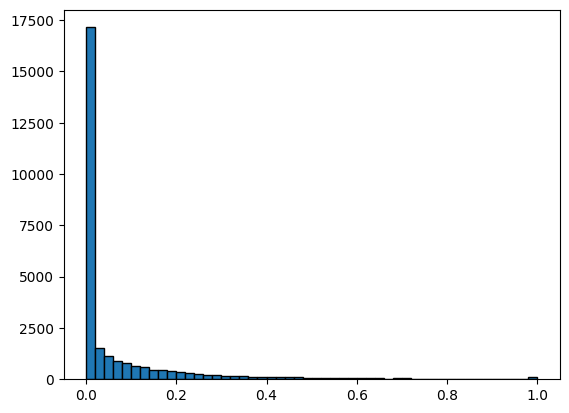

In [22]:
import matplotlib.pyplot as plt

plt.hist(prevalence_z, bins=50, edgecolor='black')
plt.show()

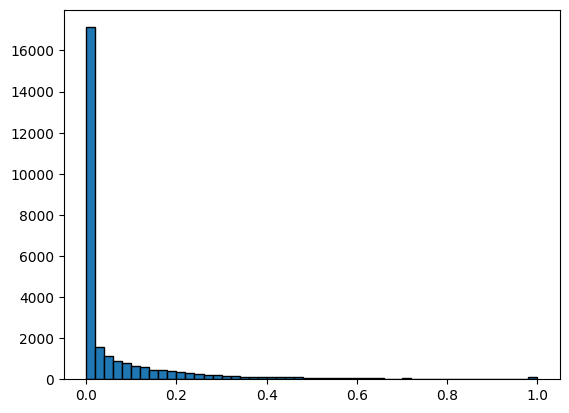

In [23]:
plt.hist(prevalence_no, bins=50, edgecolor='black')
plt.show()

In [ ]:
diff = prevalence_no - prevalence_z
print(len(diff))
sum([abs(d) <= 0.001 for d in diff])

In [21]:
np.allclose(prevalence_z, prevalence_raw)

True